In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
bigdata = pd.read_csv("../data/imbalance_de.csv", header=None)

In [3]:
bigdata.head()

,0,1,2
0,2013-12-31 23:00:00,707.500,156.36
1,2013-12-31 23:15:00,966.296,81.23
2,2013-12-31 23:30:00,1018.984,104.01
3,2013-12-31 23:45:00,867.940,60.51
4,2014-01-01 00:00:00,1738.004,239.03


In [4]:
bigdata = bigdata[[0, 2]]

In [5]:
bigdata.rename(columns={0: 'datetime', 2: 'imbalance_price_target'}, inplace=True)

In [6]:
bigdata = bigdata.set_index('datetime')

In [7]:
bigdata.index = pd.to_datetime(bigdata.index)

In [8]:
# add time features
bigdata['year'] = bigdata.index.year
bigdata['month'] = bigdata.index.month
bigdata['day'] = bigdata.index.day
bigdata['weekday'] = bigdata.index.weekday
bigdata['hour'] = bigdata.index.hour

In [9]:
bigdata

,imbalance_price_target,year,month,day,weekday,hour
datetime,,,,,,
2013-12-31 23:00:00,156.36,2013,12,31,1,23
2013-12-31 23:15:00,81.23,2013,12,31,1,23
2013-12-31 23:30:00,104.01,2013,12,31,1,23
2013-12-31 23:45:00,60.51,2013,12,31,1,23
2014-01-01 00:00:00,239.03,2014,1,1,2,0
...,...,...,...,...,...,...
2021-05-20 13:00:00,40.96,2021,5,20,3,13
2021-05-20 14:30:00,25.53,2021,5,20,3,14
2021-05-21 20:15:00,18.48,2021,5,21,4,20


In [10]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257010 entries, 2013-12-31 23:00:00 to 2021-05-22 22:00:00
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   imbalance_price_target  257010 non-null  float64
 1   year                    257010 non-null  int64  
 2   month                   257010 non-null  int64  
 3   day                     257010 non-null  int64  
 4   weekday                 257010 non-null  int64  
 5   hour                    257010 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 13.7 MB


In [11]:
bigdata.describe()

,imbalance_price_target,year,month,day,weekday,hour
count,257010.000000,257010.000000,257010.000000,257010.000000,257010.000000,257010.000000
mean,34.069293,2017.180195,6.342220,15.720949,2.999949,11.499961
std,127.651278,2.122973,3.480009,8.796245,1.999079,6.922110
min,-6503.730000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,5.280000,2015.000000,3.000000,8.000000,1.000000,6.000000
50%,38.080000,2017.000000,6.000000,16.000000,3.000000,11.500000
75%,60.940000,2019.000000,9.000000,23.000000,5.000000,17.000000
max,24455.050000,2021.000000,12.000000,31.000000,6.000000,23.000000


<AxesSubplot:>

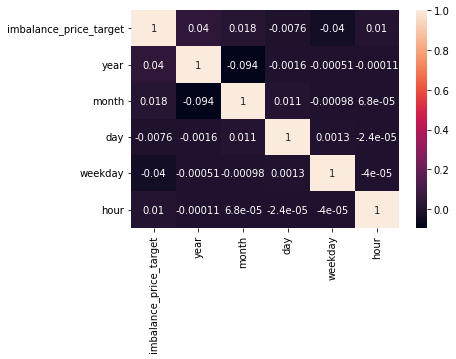

In [12]:
sns.heatmap(bigdata.corr(), annot=True)

In [13]:
# remove probable outliers
bigdata[np.abs(bigdata['imbalance_price_target']) > 1000].count()

imbalance_price_target    261
year                      261
month                     261
day                       261
weekday                   261
hour                      261
dtype: int64

In [14]:
# drop outliers
bigdata = bigdata[np.abs(bigdata['imbalance_price_target']) <= 1000]

### Plots

Text(0.5, 1.0, 'Years')

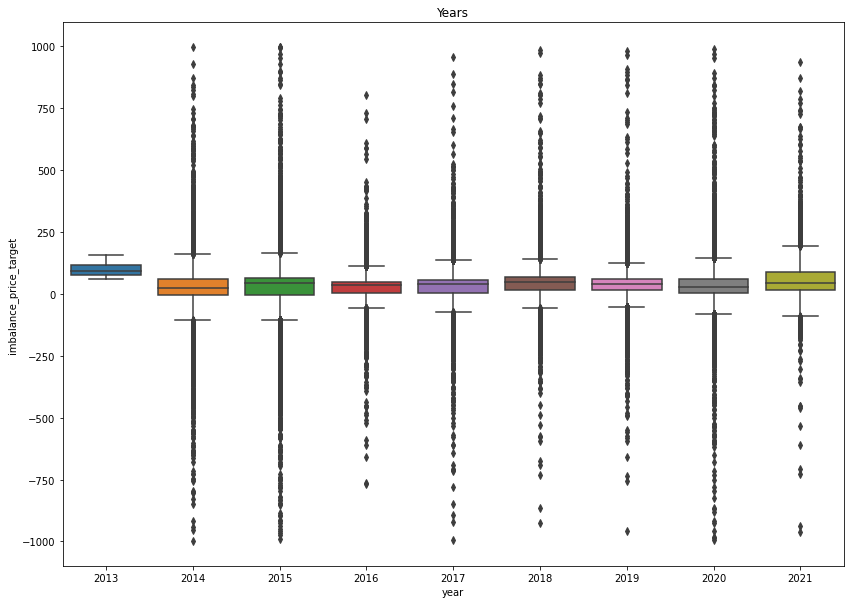

In [15]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=bigdata['imbalance_price_target'])
plt.title('Years')

Text(0.5, 1.0, 'Months')

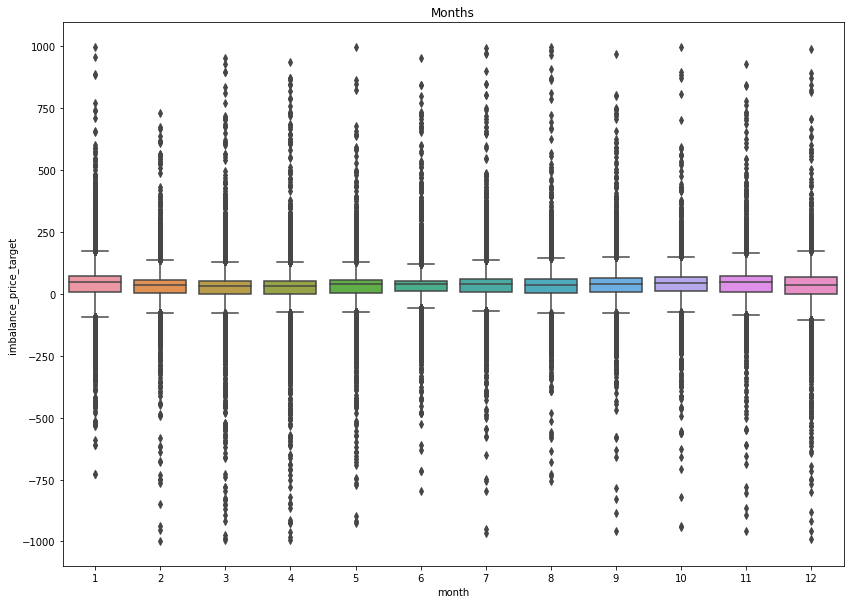

In [16]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=bigdata['imbalance_price_target'])
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

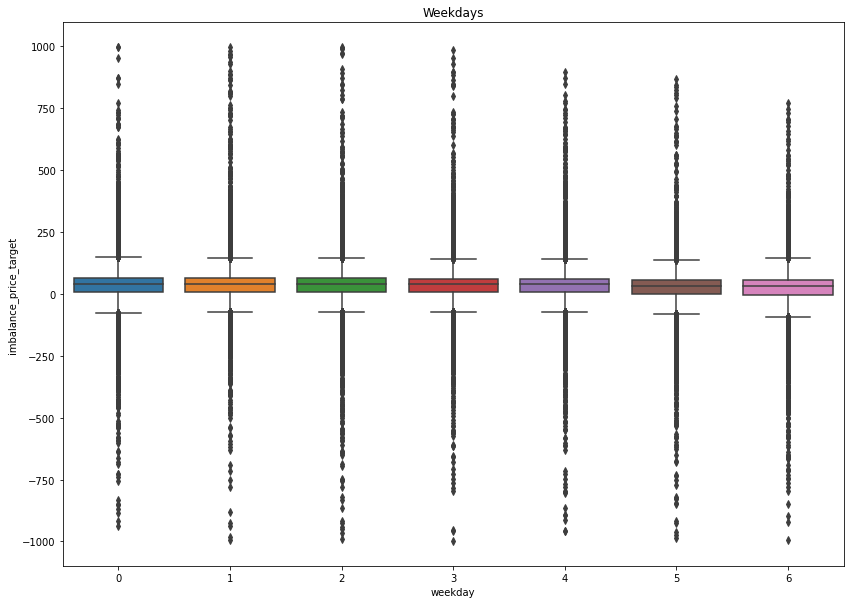

In [17]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=bigdata['imbalance_price_target'])
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

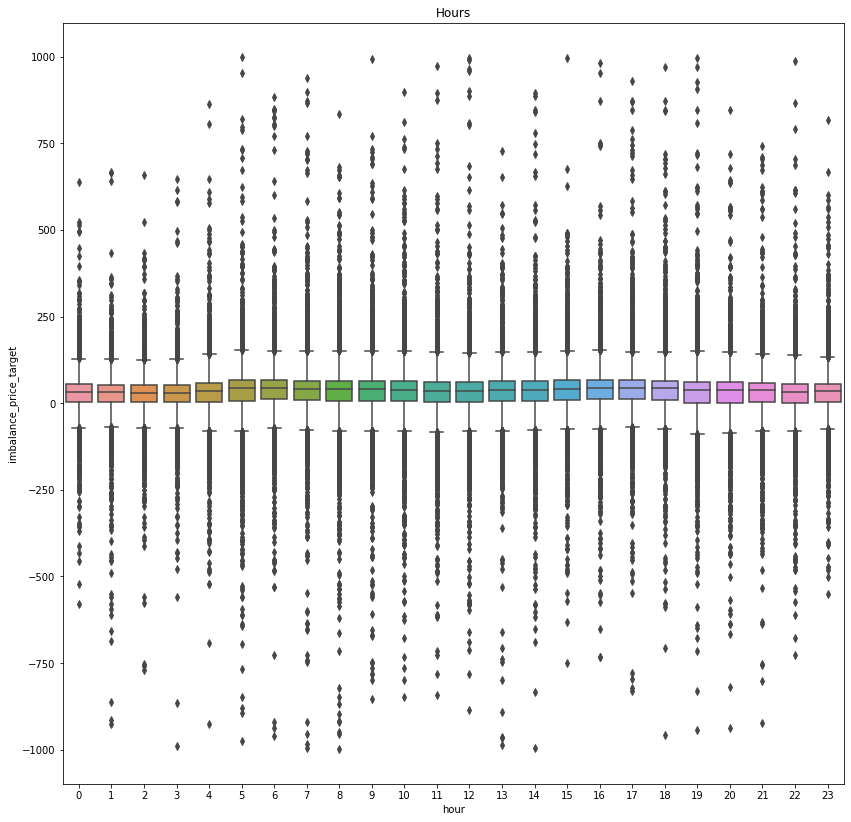

In [18]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=bigdata['imbalance_price_target'])
plt.title('Hours')

Text(0.5, 1.0, 'Years')

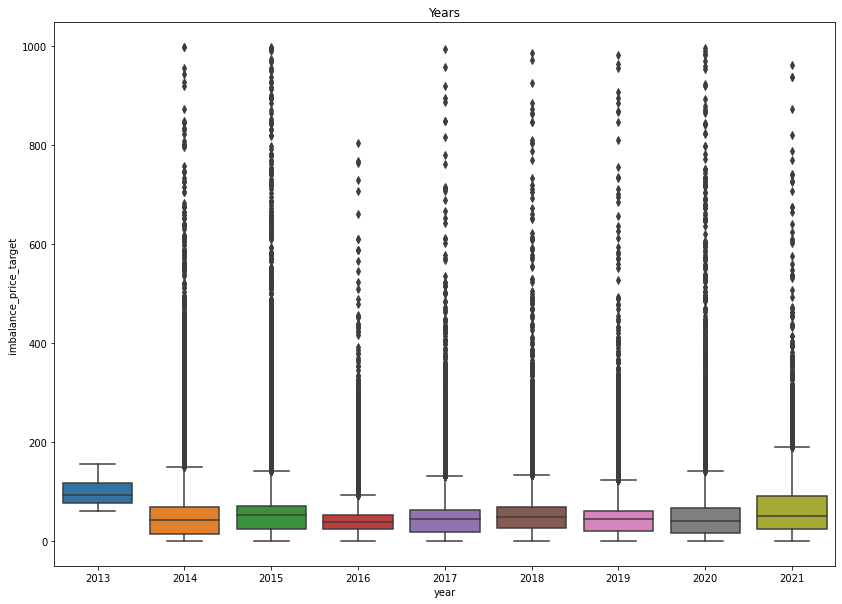

In [19]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['year'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Years')

Text(0.5, 1.0, 'Months')

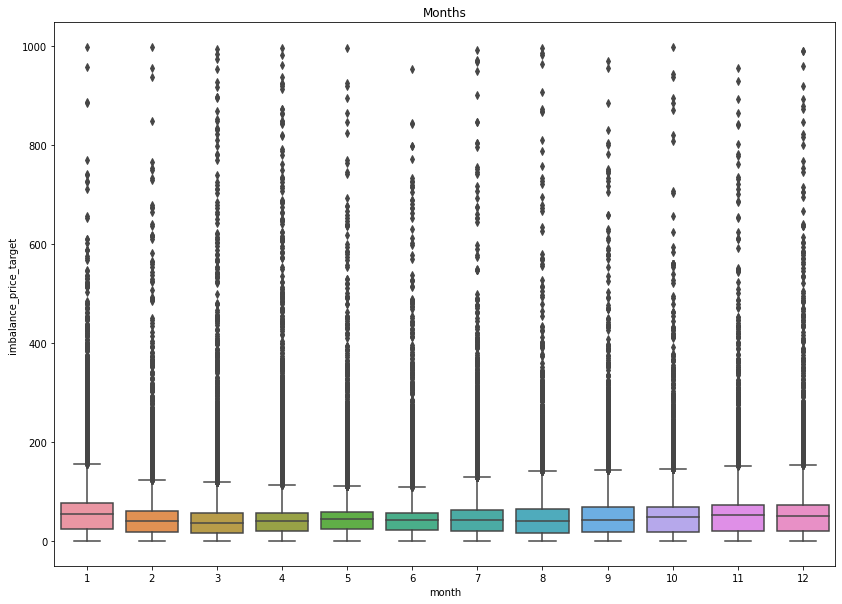

In [20]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['month'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Months')

Text(0.5, 1.0, 'Weekdays')

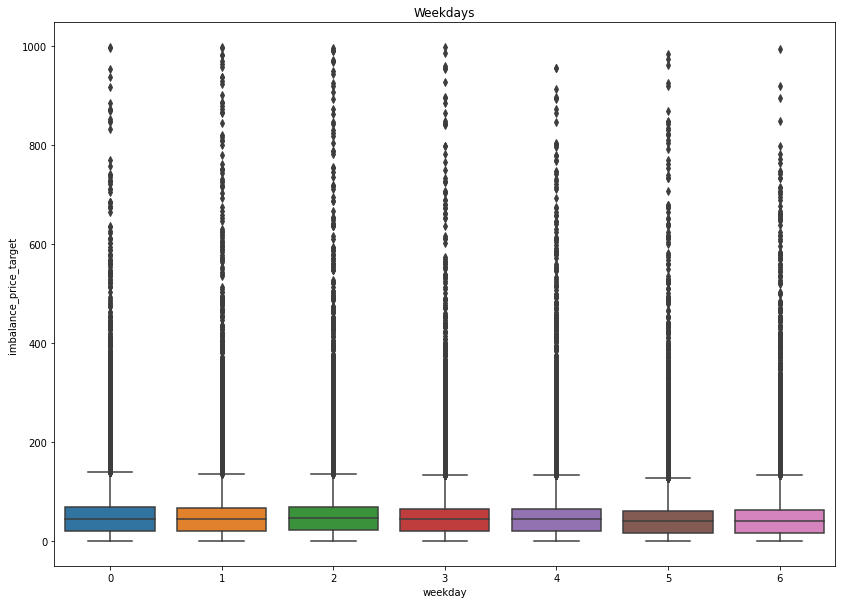

In [21]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bigdata, x=bigdata['weekday'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Weekdays')

Text(0.5, 1.0, 'Hours')

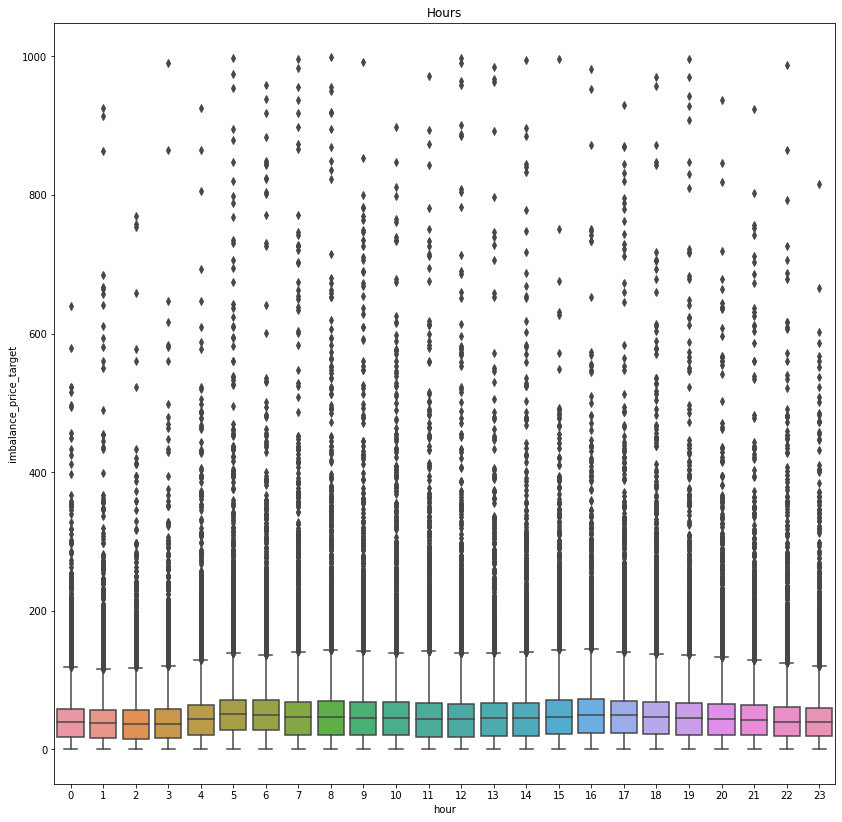

In [22]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bigdata, x=bigdata['hour'], y=np.abs(bigdata['imbalance_price_target']))
plt.title('Hours')

In [23]:
data = pd.read_csv("../data/dataset_merged.csv")

In [24]:
data = data.set_index('dt_start_utc')

In [25]:
data

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,41218.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,40139.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,39917.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,40282.0,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,40528.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,56709.0,...,631.0,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485
2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,53241.0,...,701.0,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910
2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,49149.0,...,765.0,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065


### Plots imbalance energy price

#### Monthly distribution

In [26]:
months = bigdata.groupby('month').median()['imbalance_price_target']

In [27]:
months = pd.DataFrame(months)

In [28]:
months.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [29]:
months['imb_price_min'] = bigdata.groupby('month').min()['imbalance_price_target']

In [30]:
months['imb_price_max'] = bigdata.groupby('month').max()['imbalance_price_target']

In [31]:
months['imb_price_abs_median'] = np.abs(bigdata).groupby('month').median()['imbalance_price_target']

In [32]:
months

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
month,,,,
1,47.030,-726.72,998.22,53.805
2,34.850,-998.64,729.82,40.420
3,30.840,-994.24,953.02,37.400
4,32.820,-996.04,937.70,40.450
5,38.310,-925.62,996.88,44.230
6,40.010,-798.09,953.94,43.050
7,39.300,-967.46,992.58,43.630
8,36.700,-757.74,996.83,40.510
9,38.520,-956.03,970.00,42.105


Text(0.5, 1.0, 'Imbalance price - Median')

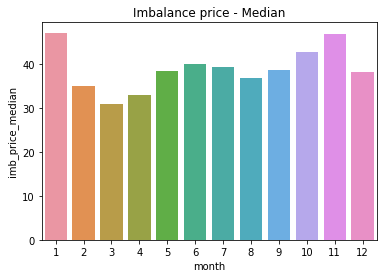

In [33]:
# distribution per month
sns.barplot(data=months, x=months.index, y=months['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

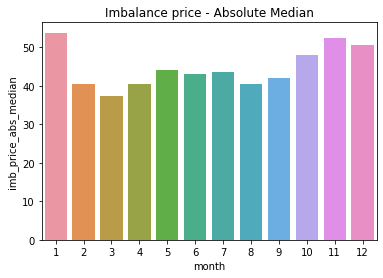

In [34]:
# distribution per month
sns.barplot(data=months, x=months.index, y=months['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '998.22'),
 Text(0, 3, '729.82'),
 Text(0, 3, '953.02'),
 Text(0, 3, '937.7'),
 Text(0, 3, '996.88'),
 Text(0, 3, '953.94'),
 Text(0, 3, '992.58'),
 Text(0, 3, '996.83'),
 Text(0, 3, '970'),
 Text(0, 3, '997.46'),
 Text(0, 3, '930.04'),
 Text(0, 3, '990.96')]

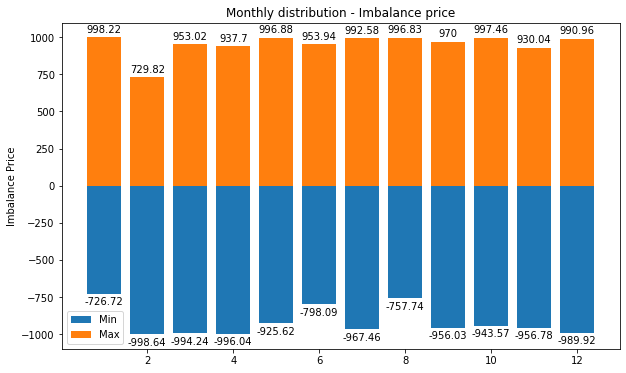

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(months.index, months['imb_price_min'], label='Min')
max = ax.bar(months.index, months['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Weekday distribution

In [36]:
weekdays = bigdata.groupby('weekday').median()['imbalance_price_target']

In [37]:
weekdays = pd.DataFrame(weekdays)

In [38]:
weekdays.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [39]:
weekdays['imb_price_min'] = bigdata.groupby('weekday').min()['imbalance_price_target']

In [40]:
weekdays['imb_price_max'] = bigdata.groupby('weekday').max()['imbalance_price_target']

In [41]:
weekdays['imb_price_abs_median'] = np.abs(bigdata).groupby('weekday').median()['imbalance_price_target']

In [42]:
weekdays

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
weekday,,,,
0,39.215,-937.78,998.22,45.10
1,40.800,-996.04,997.46,45.58
2,41.600,-989.92,996.88,46.62
3,39.970,-998.64,986.91,44.54
4,39.340,-956.78,897.42,44.27
5,32.875,-985.06,869.66,40.50
6,30.410,-994.24,771.15,41.04


Text(0.5, 1.0, 'Imbalance price - Median')

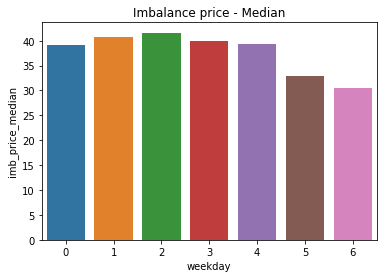

In [43]:
# distribution per month
sns.barplot(data=weekdays, x=weekdays.index, y=weekdays['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

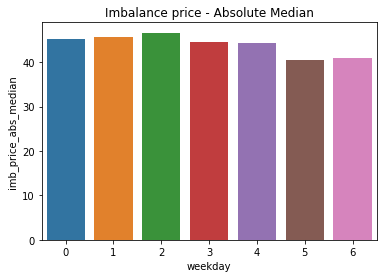

In [44]:
# distribution per month
sns.barplot(data=weekdays, x=weekdays.index, y=weekdays['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '998.22'),
 Text(0, 3, '997.46'),
 Text(0, 3, '996.88'),
 Text(0, 3, '986.91'),
 Text(0, 3, '897.42'),
 Text(0, 3, '869.66'),
 Text(0, 3, '771.15')]

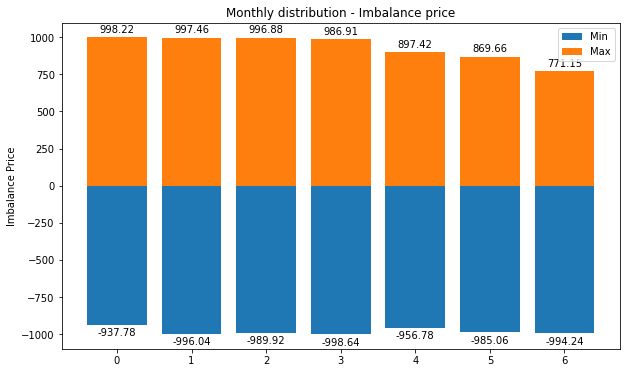

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
min = ax.bar(weekdays.index, weekdays['imb_price_min'], label='Min')
max = ax.bar(weekdays.index, weekdays['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

#### Hourly distribution

In [46]:
hours = bigdata.groupby('hour').median()['imbalance_price_target']

In [47]:
hours = pd.DataFrame(hours)

In [48]:
hours.rename(columns={'imbalance_price_target':'imb_price_median'}, inplace=True)

In [49]:
hours['imb_price_min'] = bigdata.groupby('hour').min()['imbalance_price_target']

In [50]:
hours['imb_price_max'] = bigdata.groupby('hour').max()['imbalance_price_target']

In [51]:
hours['imb_price_abs_median'] = np.abs(bigdata).groupby('hour').median()['imbalance_price_target']

In [52]:
hours

,imb_price_median,imb_price_min,imb_price_max,imb_price_abs_median
hour,,,,
0,33.450,-578.89,639.89,38.960
1,32.350,-925.75,666.78,38.060
2,30.450,-770.25,658.38,37.040
3,29.935,-989.92,646.55,36.870
4,36.660,-925.62,864.53,43.390
5,43.860,-974.83,998.22,50.260
6,45.180,-959.22,884.36,50.095
7,41.710,-996.04,937.70,46.580
8,40.170,-998.64,835.56,46.640


Text(0.5, 1.0, 'Imbalance price - Median')

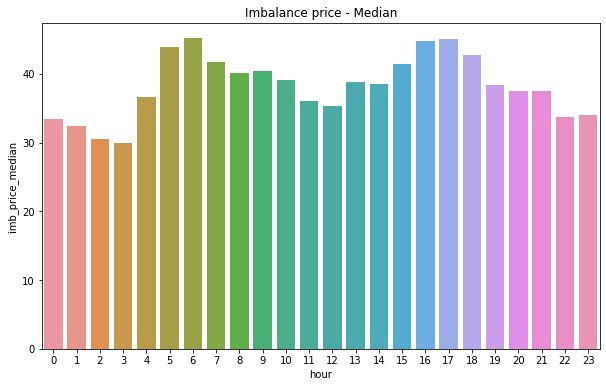

In [53]:
# distribution per hour
plt.figure(figsize=(10, 6))
sns.barplot(data=hours, x=hours.index, y=hours['imb_price_median'])
plt.title('Imbalance price - Median')

Text(0.5, 1.0, 'Imbalance price - Absolute Median')

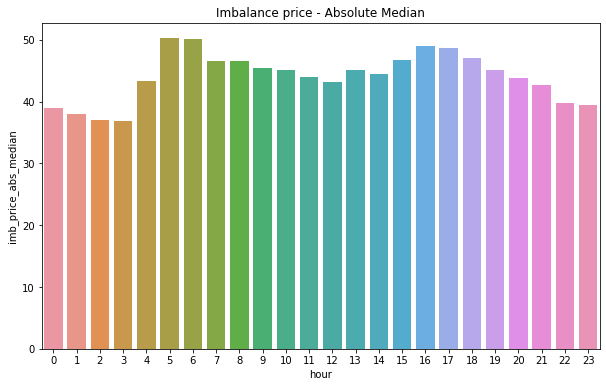

In [54]:
# distribution per hour
plt.figure(figsize=(10, 6))
sns.barplot(data=hours, x=hours.index, y=hours['imb_price_abs_median'])
plt.title('Imbalance price - Absolute Median')

[Text(0, 3, '639.89'),
 Text(0, 3, '666.78'),
 Text(0, 3, '658.38'),
 Text(0, 3, '646.55'),
 Text(0, 3, '864.53'),
 Text(0, 3, '998.22'),
 Text(0, 3, '884.36'),
 Text(0, 3, '937.7'),
 Text(0, 3, '835.56'),
 Text(0, 3, '992.58'),
 Text(0, 3, '897.42'),
 Text(0, 3, '972.14'),
 Text(0, 3, '997.46'),
 Text(0, 3, '727.5'),
 Text(0, 3, '896.28'),
 Text(0, 3, '996.83'),
 Text(0, 3, '981.54'),
 Text(0, 3, '930.04'),
 Text(0, 3, '970.43'),
 Text(0, 3, '996.88'),
 Text(0, 3, '846.13'),
 Text(0, 3, '742.75'),
 Text(0, 3, '986.91'),
 Text(0, 3, '816.35')]

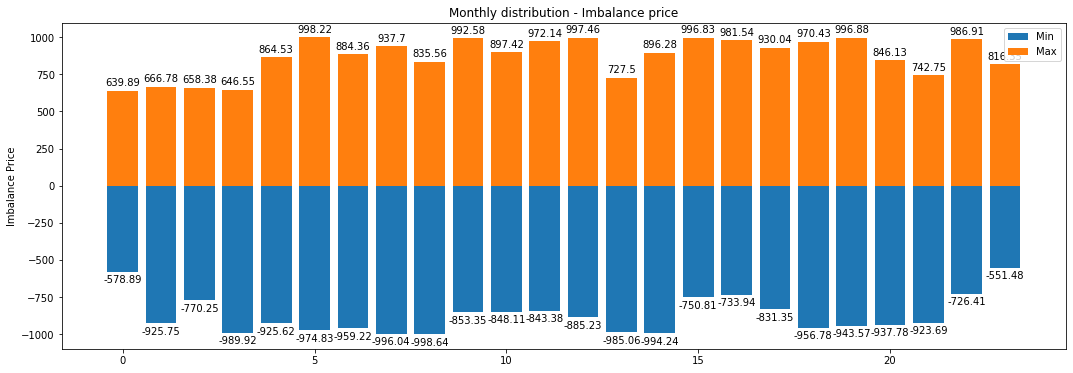

In [55]:
fig, ax = plt.subplots(figsize=(18, 6))
min = ax.bar(hours.index, hours['imb_price_min'], label='Min')
max = ax.bar(hours.index, hours['imb_price_max'], label='Max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Imbalance Price')
ax.set_title('Monthly distribution - Imbalance price')
ax.legend()

ax.bar_label(min, padding=3)
ax.bar_label(max, padding=3)

## Plots - Imbalance Price

In [56]:
# aggregate data on hourly timesteps and interpolate missing values
def fill_missing(data):
    data = data.resample('1H').median()
    data = data.interpolate(method='time', limit_direction='both')
    return data

In [57]:
bigdata_1h = fill_missing(bigdata)

<AxesSubplot:xlabel='datetime'>

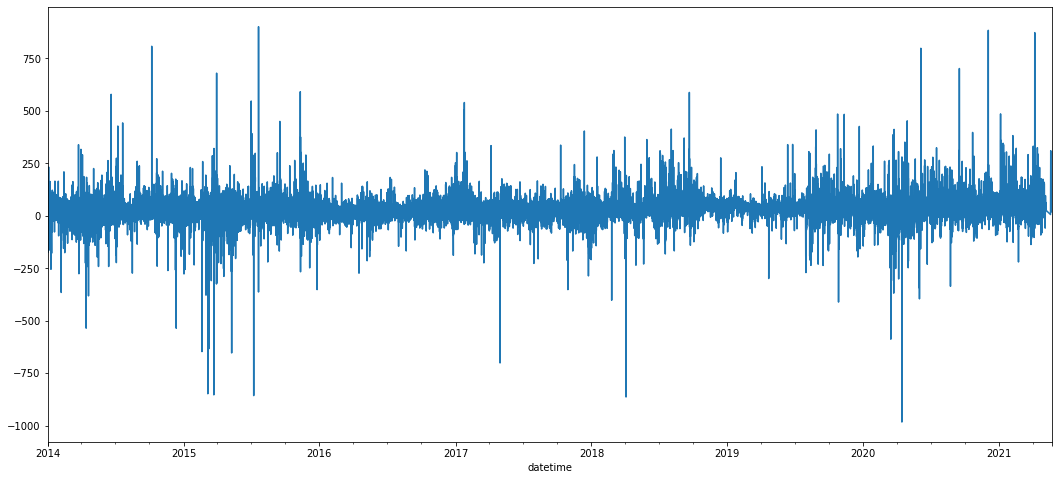

In [58]:
# plot the orginal timeseries
plt.figure(figsize=(18,8))
bigdata_1h['imbalance_price_target'].plot()

### Timeseries decomposition

#### Start: 2019

In [59]:
bigdata_1h_19_21 = bigdata_1h[bigdata_1h.index > '2018-12-31 23:00:00']

In [60]:
# Define plotting parameters and custom color palette 
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
#sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

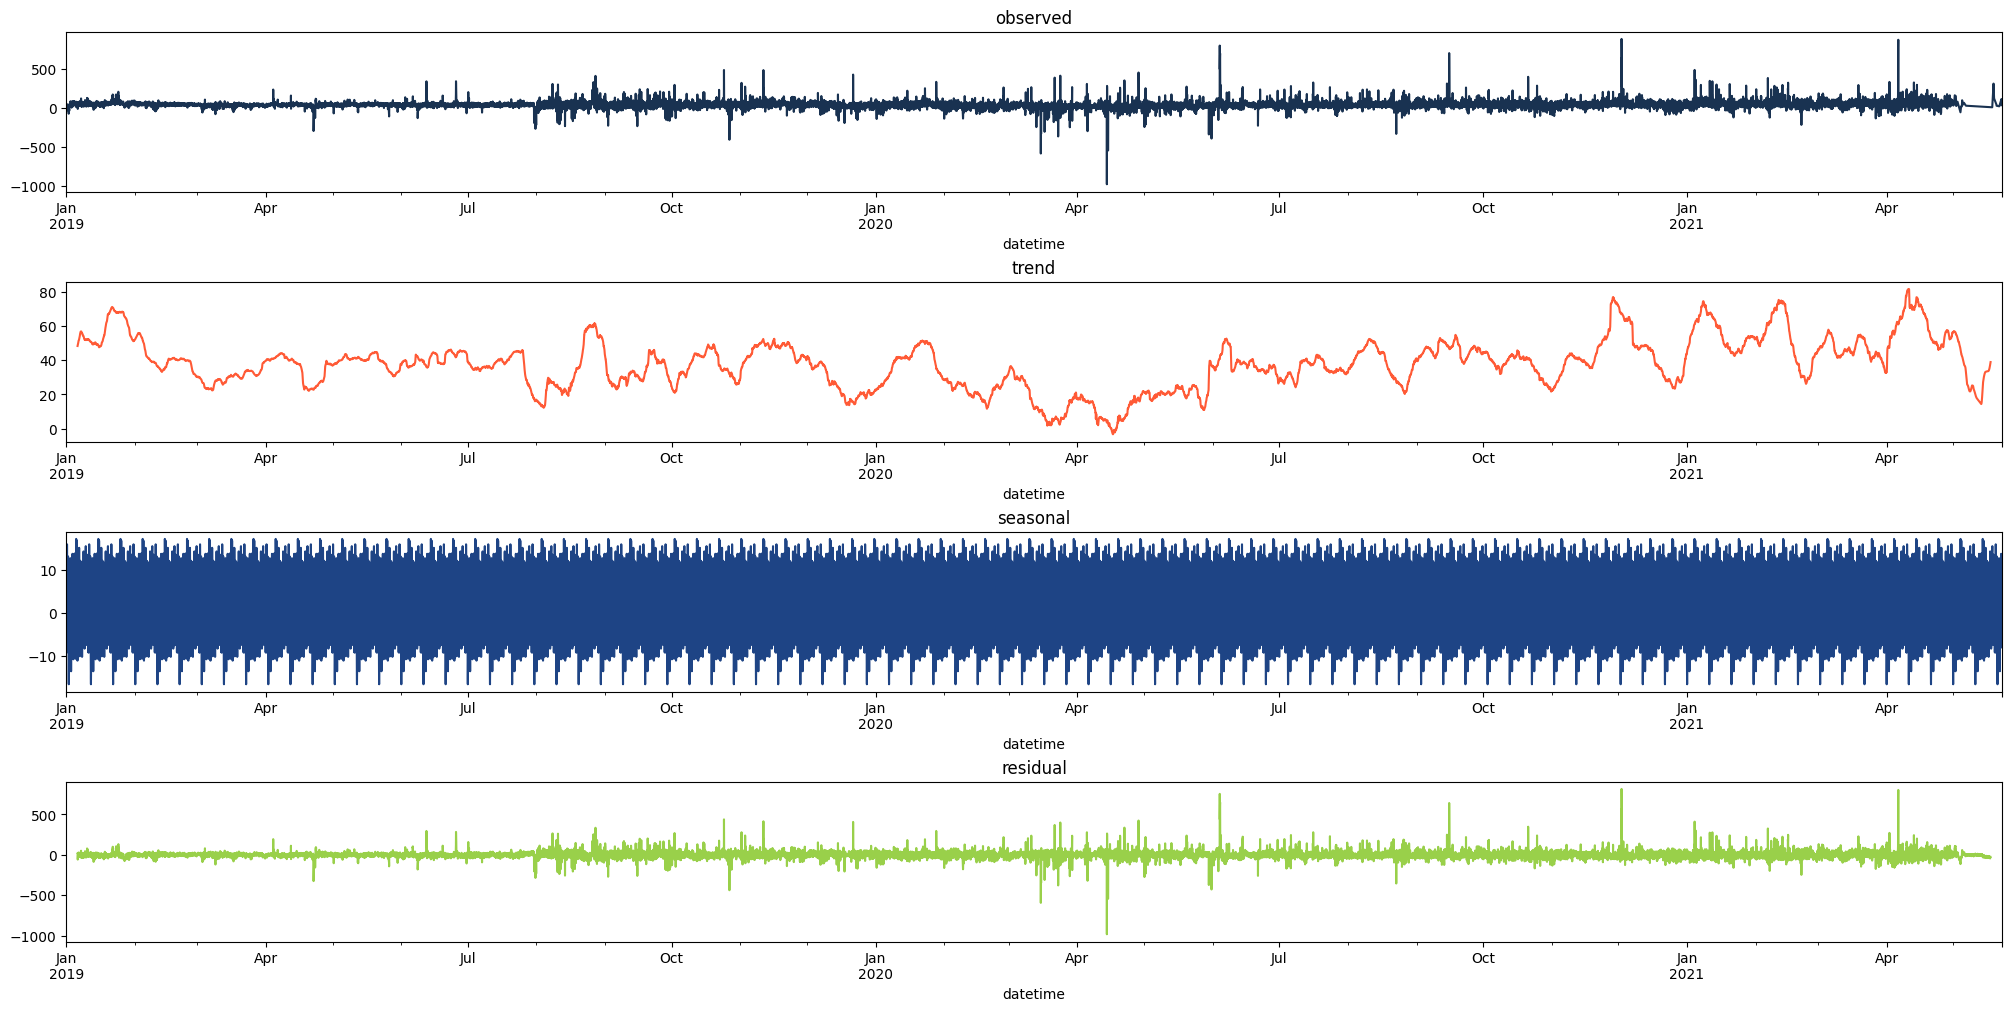

In [171]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=bigdata_1h_19_21['imbalance_price_target'], 
                                   model='additive',
                                   period=240)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

#### Start: 2020

In [62]:
bigdata_1h_20_21 = bigdata_1h_19_21[bigdata_1h_19_21.index > '2019-12-31 23:00:00']

In [63]:
# Define plotting parameters and custom color palette 
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
#sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

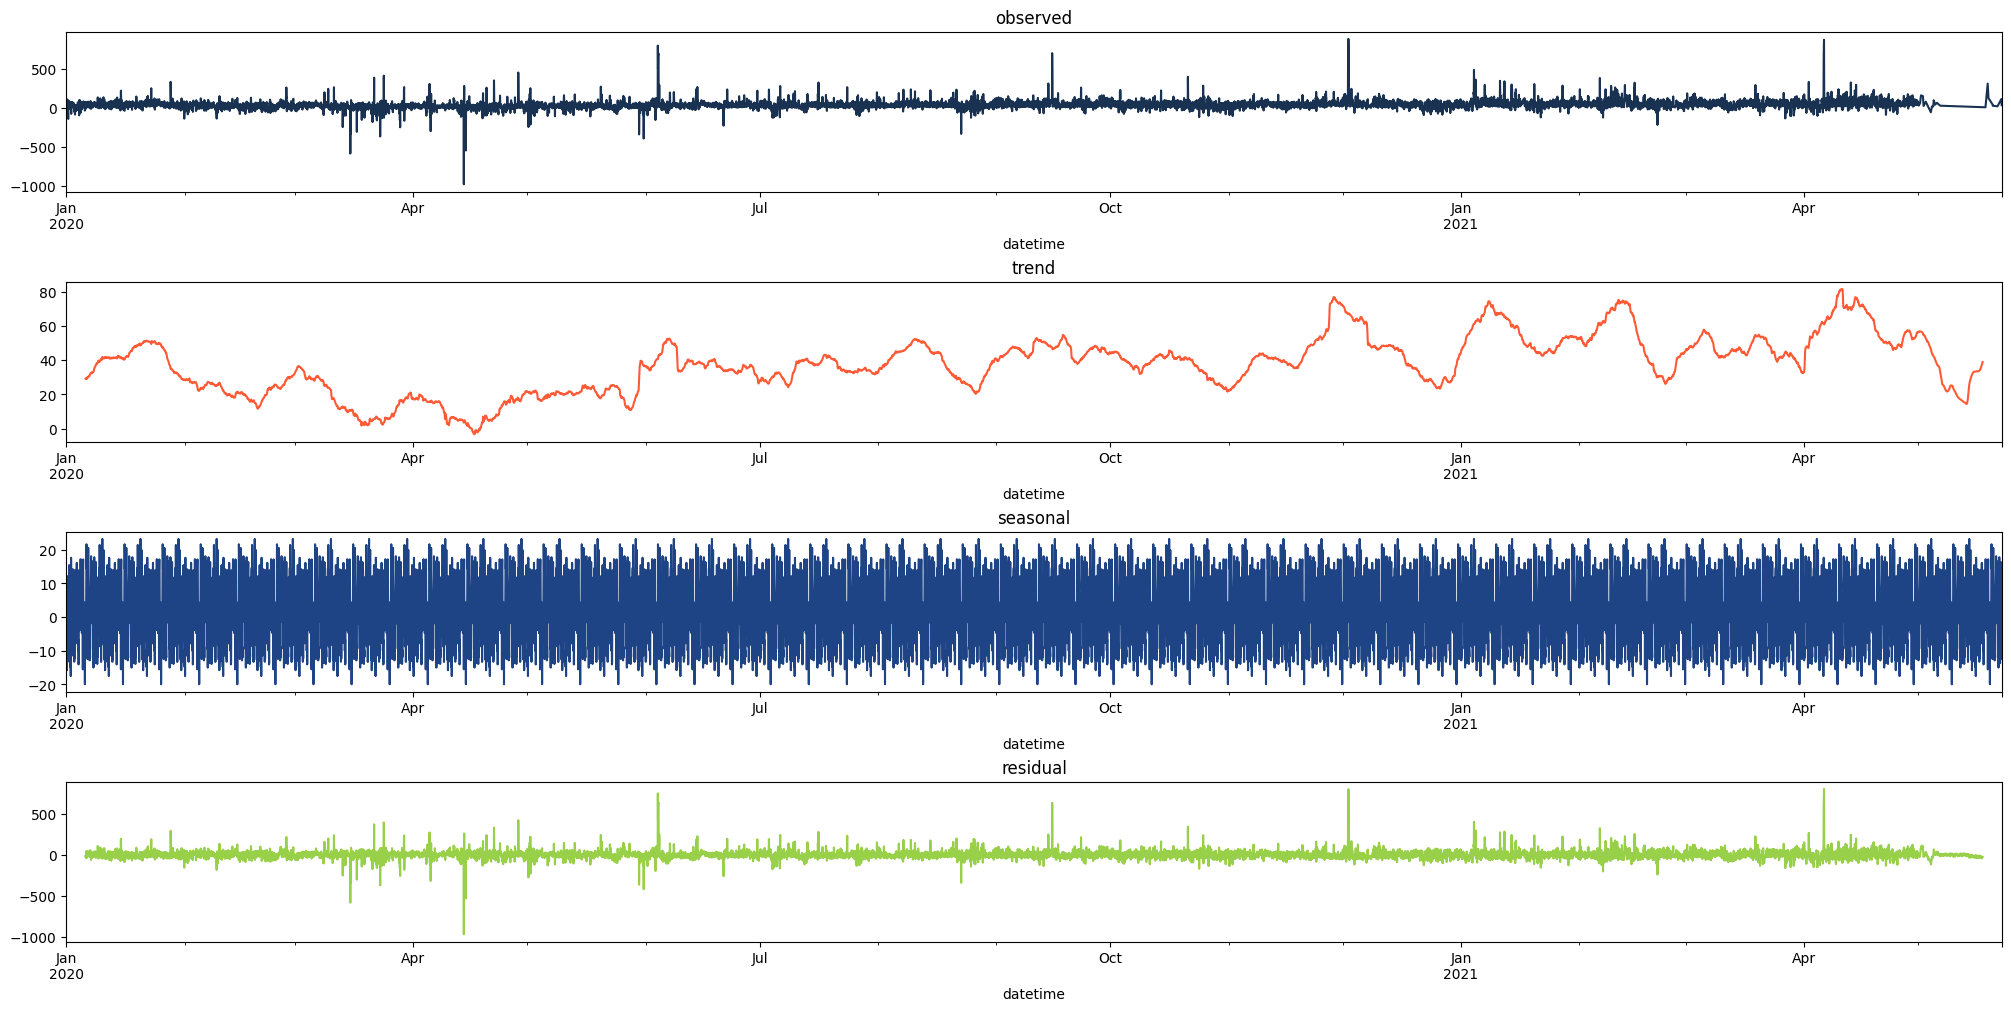

In [170]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=bigdata_1h_20_21['imbalance_price_target'], 
                                   model='additive',
                                   period=240)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='observed')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

## Check for stationarity

In [65]:
print ('Results of KPSS Test:')
kpsstest = kpss(bigdata_1h_19_21['imbalance_price_target'], regression='c', nlags='legacy')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(bigdata_1h_19_21['imbalance_price_target'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of KPSS Test:
Test Statistic            2.447618
p-value                   0.010000
Lags Used                46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of Dickey-Fuller Test:


/Users/laurenthartmann/neuefische/capstone_energy/.venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic                -1.399294e+01
p-value                        3.986329e-26
#Lags Used                     4.600000e+01
Number of Observations Used    2.090400e+04
Critical Value (1%)           -3.430663e+00
Critical Value (5%)           -2.861678e+00
Critical Value (10%)          -2.566844e+00
dtype: float64


### Results stationarity tests:
Both tests must be rejected based on the p-value. There is no clear evidence for stationarity or non-stationarity.

### Rolling mean and rolling standard deviation

In [66]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=24).mean()
    rolling_std = timeseries.rolling(window=24).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

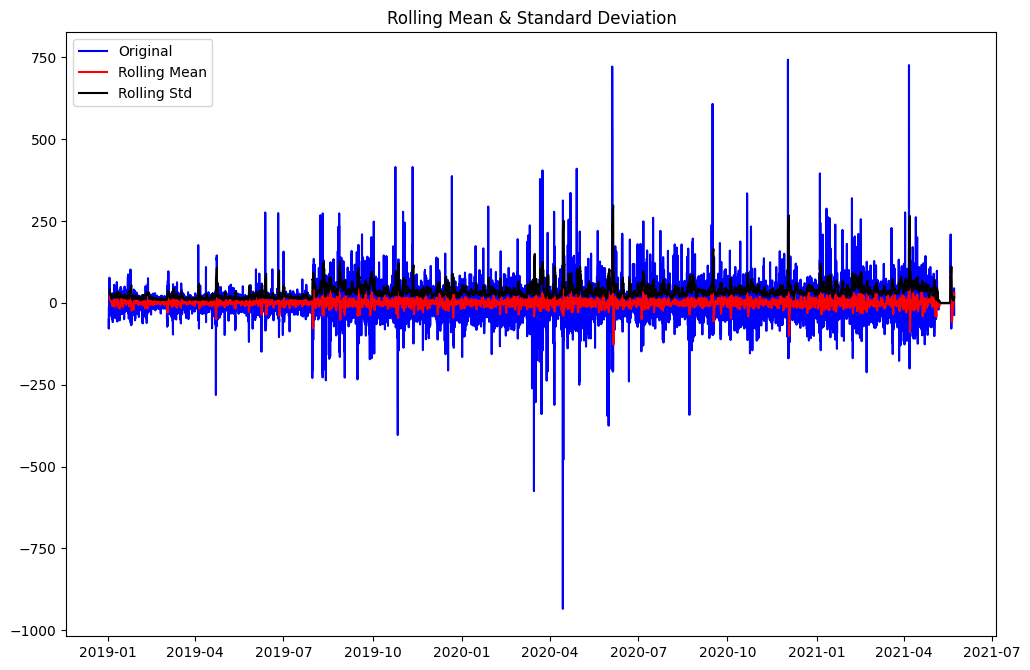

In [67]:
plt.figure(figsize=(12, 8))

rolling_mean = bigdata_1h_19_21['imbalance_price_target'].rolling(window=24).mean()
bigdata_1h_19_21_minus_mean = bigdata_1h_19_21['imbalance_price_target'] - rolling_mean
bigdata_1h_19_21_minus_mean.dropna(inplace=True)
get_stationarity(bigdata_1h_19_21_minus_mean)

In [68]:
bigdata_1h_19_21_diff = bigdata_1h_19_21 - bigdata_1h_19_21.shift(1)

In [69]:
bigdata_1h_19_21_diff = bigdata_1h_19_21_diff.iloc[1:]

<AxesSubplot:xlabel='datetime'>

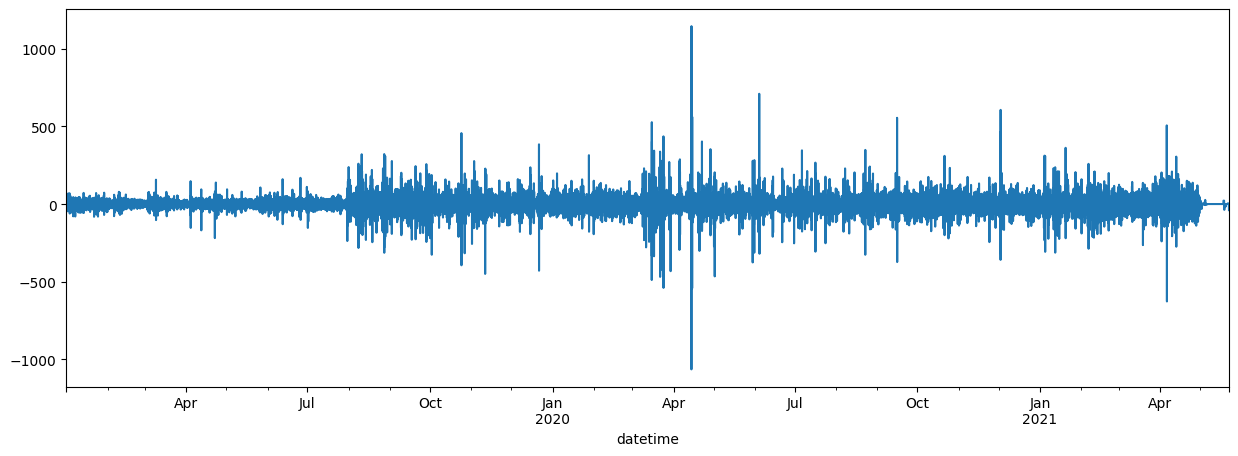

In [70]:
bigdata_1h_19_21_diff['imbalance_price_target'].plot()

In [71]:
# ADF test
print("ADF Test:")
adf_test = adfuller(bigdata_1h_19_21_diff['imbalance_price_target'],autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('----'*10)

# KPSS test
print("KPSS Test:")
kpss_test = kpss(bigdata_1h_19_21_diff['imbalance_price_target'], regression='c', nlags="legacy", store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('----'*10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -33.545451
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.001534
p-value: 0.100000
----------------------------------------


/Users/laurenthartmann/neuefische/capstone_energy/.venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


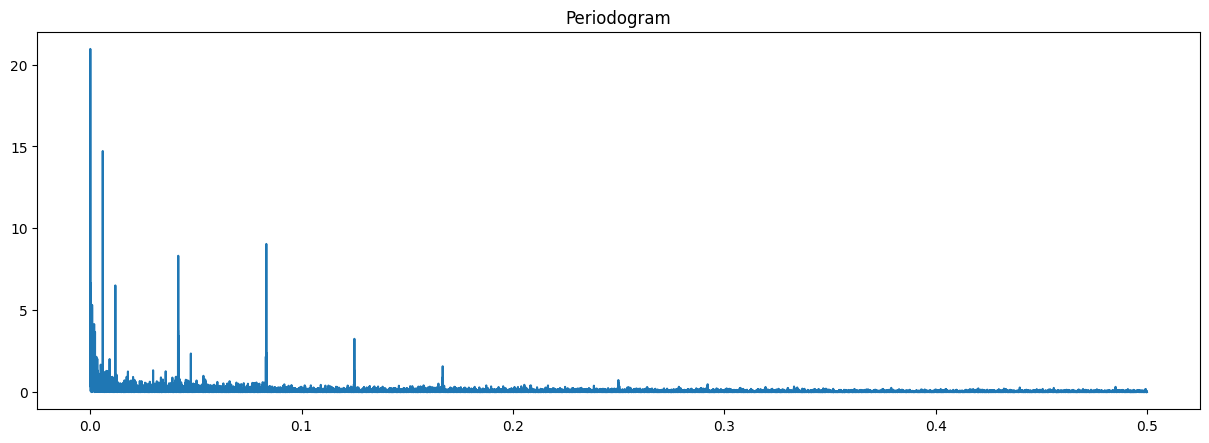

In [130]:
from scipy import signal
# We use for the sampling frequency 1 as we want to
# discover cycles over the original time steps.
f, Pxx = signal.periodogram(bigdata_1h['imbalance_price_target'], fs = 1, window='hamming', scaling='spectrum')
plt.plot(f, Pxx)
plt.title('Periodogram')
plt.show();

In [147]:
Pxx

array([6.88528393e-01, 1.31229719e+01, 9.13310882e+00, ...,
       2.09834623e-03, 1.59742031e-02, 4.22041822e-03])

In [145]:
np.argmax(Pxx)

4

In [168]:
np.argsort(Pxx)[-10:]

array([2699, 5398,    2,    3,    1,    7,    5,  386,  385,    4])

In [169]:
1/f[np.argsort(Pxx)[-10:]]

array([2.40000000e+01, 1.20000000e+01, 3.23880000e+04, 2.15920000e+04,
       6.47760000e+04, 9.25371429e+03, 1.29552000e+04, 1.67813472e+02,
       1.68249351e+02, 1.61940000e+04])

#### Results periodogram

frequencies:

* 0.0001: every 10000 hours
* 0.006: every 167 hours
* 0.04: every 25 hours
* 0.085: every 12 hours

In [107]:
bigdata_1h[bigdata_1h.index < '2021-05-01 00:00:00'].to_csv("../data/imbalance_1h_nooutliers.csv")